In [14]:
import pandas as pd
import numpy as np
import datetime as dt

import scipy.stats as st

import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Расширить рабочее поле ноутбука на весь экран
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

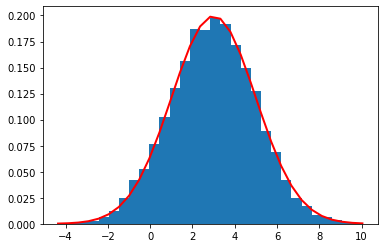

In [10]:
mu = 3
sigma = 2

s = np.random.normal(mu, sigma, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [11]:
sample_mean = 60 # другое среднее
sample_sigma = 2 # то же стандартное отклонение
sample = np.random.normal(sample_mean, sample_sigma, 10000)

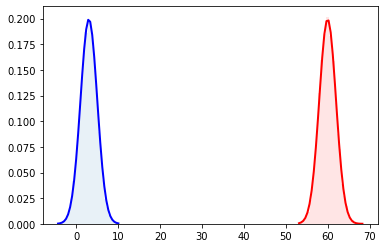

In [12]:
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)

sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)

plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),
         linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='b')
plt.show()

## Нужно проверить, является ли выборка частью генеральной совокупности? (на самом деле нет)
### H0: 
### H1:

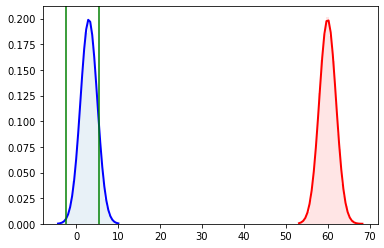

In [15]:
import scipy

ci = st.norm.interval(0.95, loc=1.5, scale=2)

count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)

plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),
         linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='b')

plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')

plt.show()

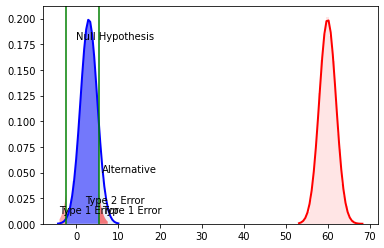

In [21]:
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)

sample_count, sample_bins, sample_ignored = plt.hist(sample, 30, alpha=0.1, color='r',density=True)

plt.plot(sample_bins,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (sample_bins - sample_mean)**2 / (2 * sample_sigma**2) ),
         linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='b')

plt.axvline(ci[0],color='g')
plt.axvline(ci[1],color='g')

plt.fill_between(x=np.arange(-4, ci[0], 0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(-4,ci[0],0.01), loc=1.5, scale=2) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(ci[1],7.5,0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[1],7.5,0.01), loc=1.5, scale=2) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(ci[0],ci[1],0.01), 
                 y1= scipy.stats.norm.pdf(np.arange(ci[0],ci[1],0.01), loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.5)

plt.text(x=0, y=0.18, s= "Null Hypothesis")
plt.text(x=6, y=0.05, s= "Alternative")
plt.text(x=-4, y=0.01, s= "Type 1 Error")
plt.text(x=6.2, y=0.01, s= "Type 1 Error")
plt.text(x=2, y=0.02, s= "Type 2 Error")

plt.show()

### Посчитаем p-value

In [17]:
z_score=(sample_mean-mu)/sigma 
p_value = scipy.stats.norm.sf(abs(z_score))

print(f'P-value = {p_value}')
 
if p_value < 0.05: 
     print('P-value < alpha: reject H0') 
else: 
     print('P-value > alpha: do not reject H0')

P-value = 5.857141253805671e-179
P-value < alpha: reject H0


In [18]:
# Мы не можем отвергнуть гипотезу h0

# две выборки, мы их извлекли из каких то генеральных совокупностей
# можем ли мы считать что выборки извлечены из одной генеральной совокупности?
# ho: выборки извлечены из одной генеральной совокупности
# p-value - близук к нулю < alpha = 0.05
# Мы отклоняем гипотезу h0